In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('bmh')

import plots
plots.plot_width = 10

# plots to draw in do_plots_all()
all_plots = ['select_real', 'store_real',
             'obj_select_real', 'obj_last_insert_real',
             'obj_insert_real', 'obj_store',
             'src_select_real', 'src_insert_real',
             'fsrc_select_real', 'fsrc_insert_real']
whiskers = 4.


# Cassandra evaluation continues

Summary of results with simulation of ~180k visits with ap_proto and 3-node Cassandra cluster at PDAC.

- JIRA ticket: https://jira.lsstcorp.org/browse/DM-23881


In [3]:
data_files = [
    "data/DM-23881/apdb-pdac-mpi7-20200317T191417.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200317T221021.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200318T014138.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200318T054557.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200318T103114.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200318T162416.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200319T010349.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200319T091741.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200319T183853.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200320T052120.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200320T130909.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200321T015133.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200321T094211.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200322T073219.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200322T163155.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200322T175349.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200322T212249.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200323T110341.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200323T200450.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200324T085518.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200324T184526.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200325T050436.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200325T113359.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200325T161408.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200326T032706.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200326T151452.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200326T234752.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200327T123450.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200328T014322.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200328T114358.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200328T152913.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200328T234959.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200329T135908.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200330T044920.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200330T201740.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200331T040431.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200331T200142.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200401T123759.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200402T054545.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200402T210411.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200403T173650.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200404T120123.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200405T065248.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200406T021541.csv.gz",
    "data/DM-23881/apdb-pdac-mpi7-20200406T223159.csv.gz",
]

In [4]:
frames = [plots._read_csv(file, filter_count=False)[0] for file in data_files]

In [5]:
df = pd.concat(frames)
del frames

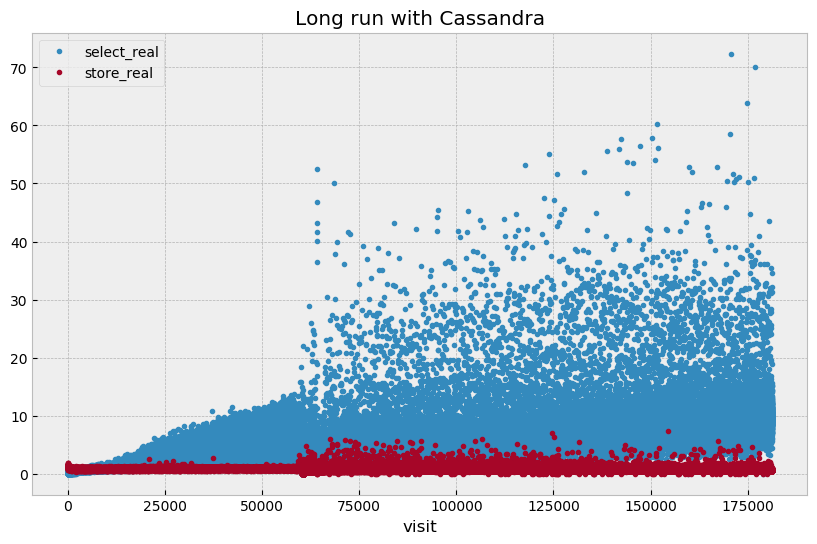

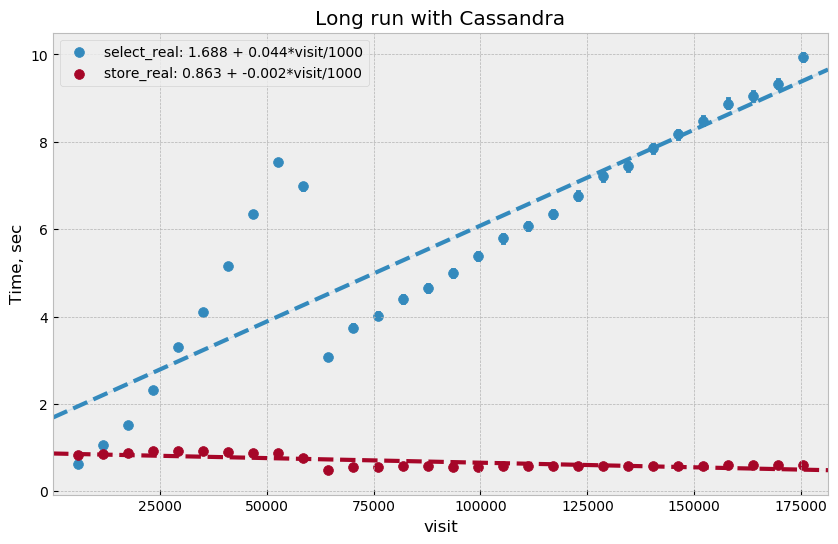

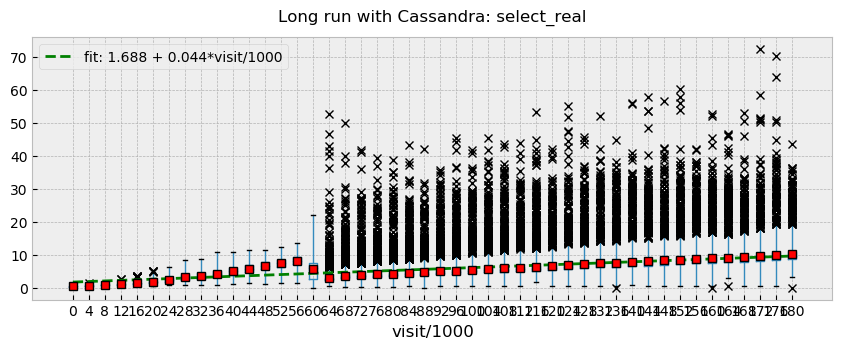

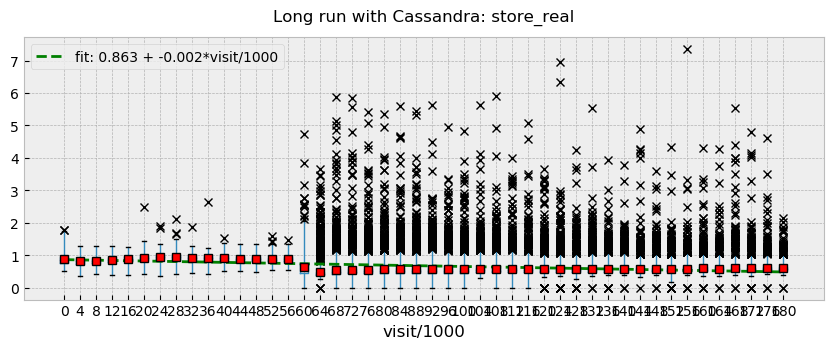

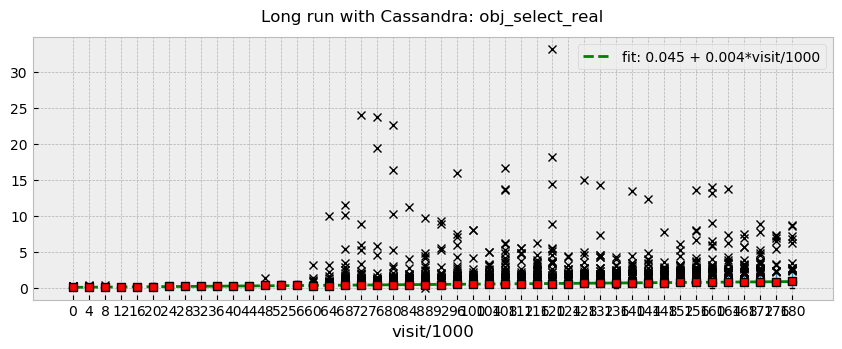

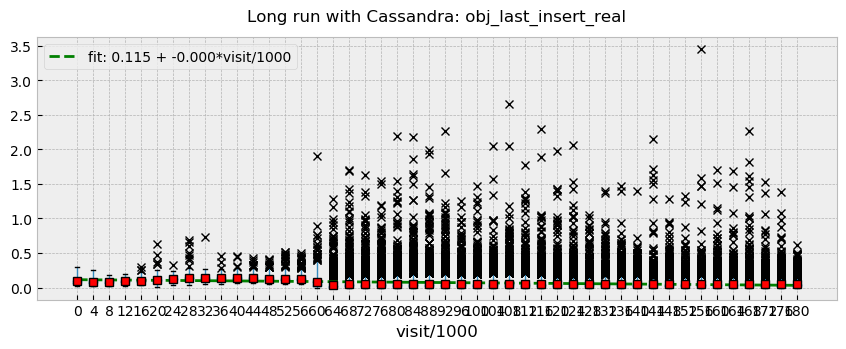

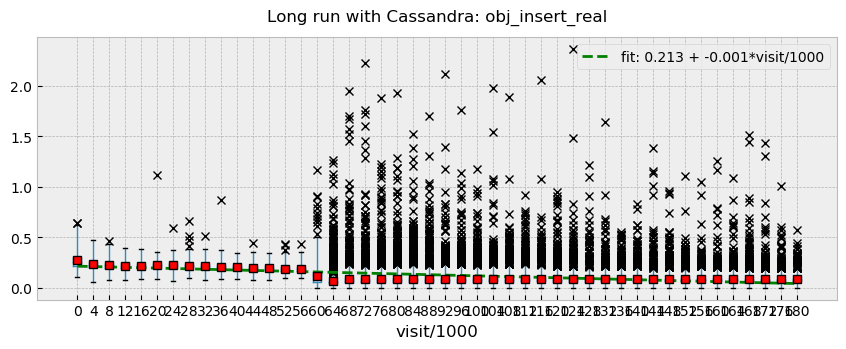

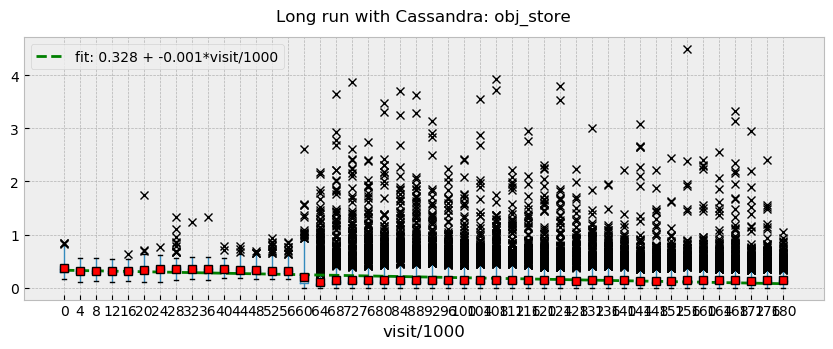

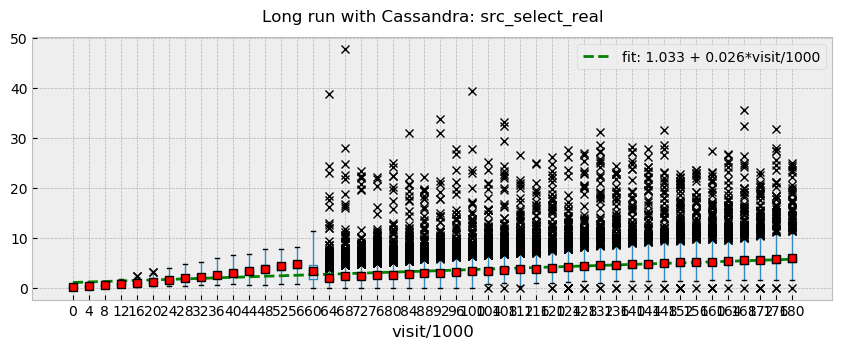

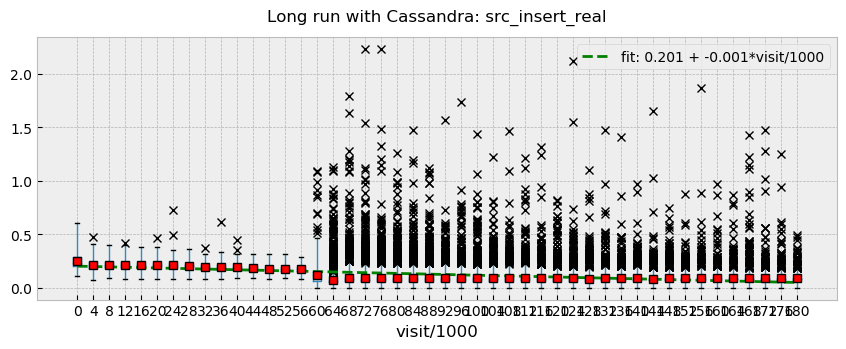

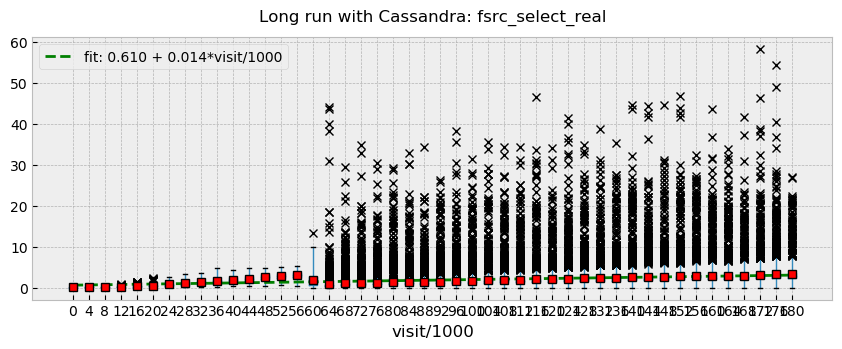

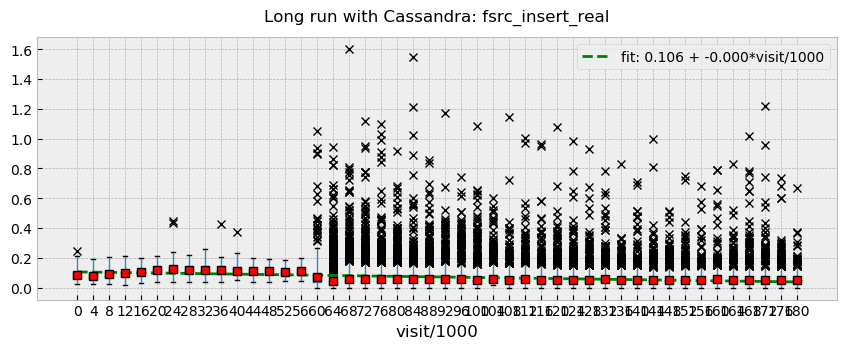

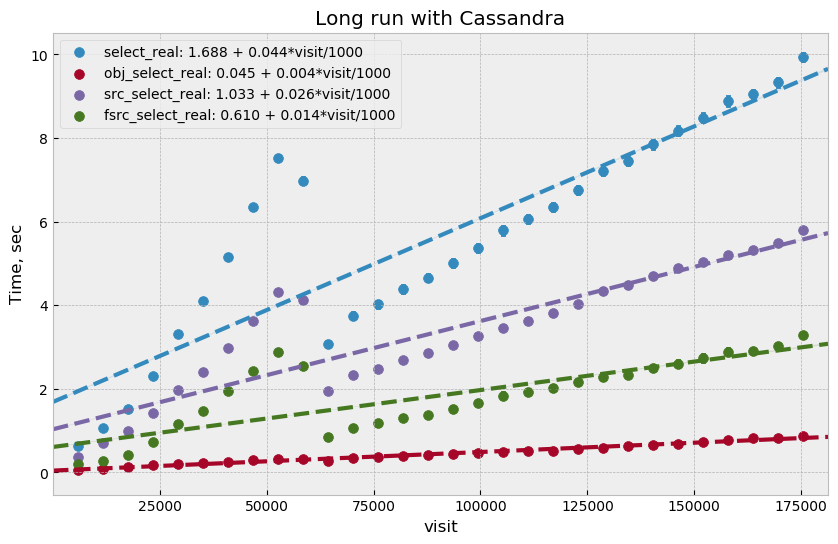

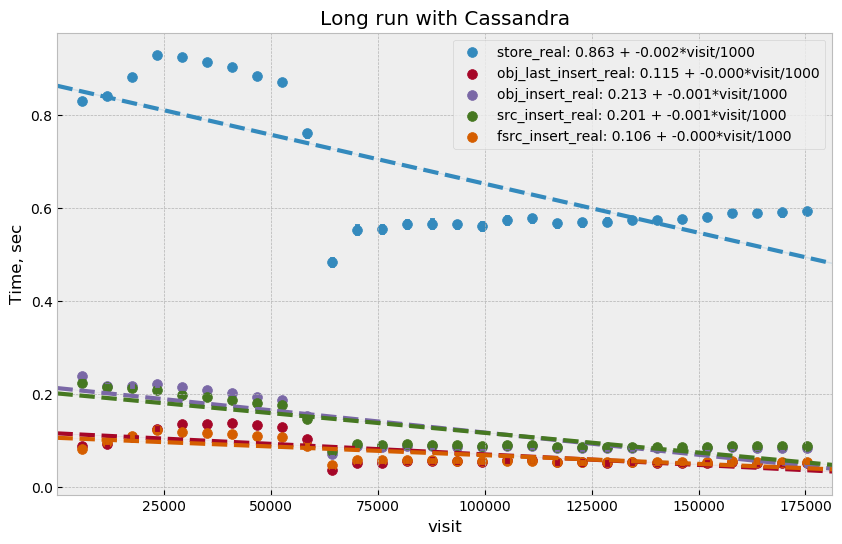

In [6]:
title = "Long run with Cassandra"
plots.do_plots_all(df, title, bin=4000, plots=all_plots, whis=whiskers);